## AI Assignment_01
<h2>Part C – Programming Task </h2>

# A* Search on a Maze — Experiments with Heuristics

## Objectives
- Implement A* search on a 2D maze.
- Use three heuristics:
  - Manhattan distance (admissible + consistent)
  - Manhattan ×1.5 (non-admissible)
  - Modified heuristic (admissible but inconsistent)
- For each heuristic record:
  - Maze (ASCII + plot)
  - Heuristic name
  - Admissible? / Consistent?
  - Path found (coords + ASCII + plot)
  - Path cost
  - True BFS shortest cost
  - Is path optimal?
  - Short comment


In [22]:
import heapq
import matplotlib.pyplot as plt
from collections import deque


## Maze Class

In [23]:
class Maze:
    def __init__(self, grid):
        """
        grid: 2D list with:
        - 0 = free cell
        - 1 = wall
        - 'A' = start
        - 'B' = goal
        """
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.start, self.goal = self._find_points()
    
    def _find_points(self):
        start = goal = None
        for r in range(self.rows):
            for c in range(self.cols):
                if self.grid[r][c] == "A":
                    start = (r, c)
                elif self.grid[r][c] == "B":
                    goal = (r, c)
        return start, goal
    
    def is_valid(self, r, c):
        return (0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] != 1)
    
    def neighbors(self, r, c):
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if self.is_valid(nr, nc):
                yield (nr, nc)
    
    def show(self, path=None, title="Maze"):
        plt.figure(figsize=(5,5))
        for r in range(self.rows):
            for c in range(self.cols):
                if self.grid[r][c] == 1:
                    plt.plot(c, self.rows-r-1, "ks")  # black wall
                elif self.grid[r][c] == "A":
                    plt.plot(c, self.rows-r-1, "go", markersize=12)  # start
                elif self.grid[r][c] == "B":
                    plt.plot(c, self.rows-r-1, "ro", markersize=12)  # goal
        
        if path:
            xs = [c for r,c in path]
            ys = [self.rows-r-1 for r,c in path]
            plt.plot(xs, ys, "b-o", label="Path")
        
        plt.title(title)
        plt.grid(True)
        plt.legend()
        plt.show()


## BFS (for shortest path baseline)

In [24]:
def bfs_shortest_path(maze):
    queue = deque([(maze.start, [maze.start])])
    visited = {maze.start}
    while queue:
        (r,c), path = queue.popleft()
        if (r,c) == maze.goal:
            return path
        for nb in maze.neighbors(r,c):
            if nb not in visited:
                visited.add(nb)
                queue.append((nb, path+[nb]))
    return None


## Heuristics

In [ ]:
class Heuristics:
    @staticmethod
    def manhattan(node, goal):
        return abs(node[0]-goal[0]) + abs(node[1]-goal[1])
    
    @staticmethod
    def scaled_manhattan(node, goal):
        return 1.5 * Heuristics.manhattan(node, goal)
    
    @staticmethod
    def inconsistent(node, goal):
        # Artificially inconsistent heuristic: add bonus if on even row
        base = Heuristics.manhattan(node, goal)
        return base + (2 if node[0] % 2 == 0 else 0)

The A* Algorithm Implementation

## **A Star Class Implentation**

In [26]:
class AStar:
    def __init__(self, maze, heuristic):
        self.maze = maze
        self.heuristic = heuristic
    
    def search(self):
        start, goal = self.maze.start, self.maze.goal
        open_set = [(0 + self.heuristic(start, goal), 0, start, [start])]
        heapq.heapify(open_set)
        gscore = {start: 0}
        
        while open_set:
            f, g, node, path = heapq.heappop(open_set)
            
            if node == goal:
                return path
            
            for nb in self.maze.neighbors(*node):
                tentative_g = g + 1
                if tentative_g < gscore.get(nb, float("inf")):
                    gscore[nb] = tentative_g
                    fscore = tentative_g + self.heuristic(nb, goal)
                    heapq.heappush(open_set, (fscore, tentative_g, nb, path+[nb]))
        return None


### Defining Heuristic Functions

In [27]:
# Heuristic 1: The Golden Standard (Admissible & Consistent)
def manhattan_heuristic(current_pos, end_pos):
    """Calculates the Manhattan distance between two points."""
    return abs(current_pos[0] - end_pos[0]) + abs(current_pos[1] - end_pos[1])

# Heuristic 2: The Pessimist (Non-Admissible)
def non_admissible_heuristic(current_pos, end_pos):
    """An example of a non-admissible heuristic that overestimates the cost."""
    return manhattan_heuristic(current_pos, end_pos) * 1.5 # Multiplying can cause overestimation

# Heuristic 3: The Unreliable Guide (Inconsistent)
def inconsistent_heuristic(current_pos, end_pos):
    """An example of an inconsistent heuristic with a misleading 'trap' cell."""
    # This creates an illogical dip in the heuristic landscape at (5, 5)
    if current_pos == (5, 5):
        return 1 # A very low, misleading value
    return manhattan_heuristic(current_pos, end_pos)

## Maze and Visualization 

In [28]:
# Our sample maze. 0 = path, 1 = wall.
# A more complex maze to better show the differences
maze = [
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0], # The 'trap' for the inconsistent heuristic will be at (5,5)
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start_position = (0, 0)
end_position = (9, 9)
OPTIMAL_COST = 20 # The true shortest path cost for this maze

def visualize_path(maze, path, title):
    """Visualizes the maze and the path found by the algorithm."""
    # Create a copy of the maze to draw on
    vis_maze = [row[:] for row in maze]
    
    if path:
        # Mark the path cells with a different value (e.g., 2)
        for step in path:
            if vis_maze[step[0]][step[1]] == 0:
                vis_maze[step[0]][step[1]] = 2
        # Mark start and end with special values (e.g., 3 and 4)
        vis_maze[path[0][0]][path[0][1]] = 3 # Start
        vis_maze[path[-1][0]][path[-1][1]] = 4 # End
    
    plt.figure(figsize=(8, 8))
    # Use a color map to distinguish path, walls, start, and end
    plt.imshow(vis_maze, cmap='magma')
    plt.title(title, fontsize=16)
    plt.xticks([]), plt.yticks([]) # Hide axis ticks
    plt.show()

## Utility to Check Admissibility & Consistency

In [29]:
def check_admissibility(maze, heuristic):
    shortest = {}
    queue = deque([(maze.start, 0)])
    visited = {maze.start}
    while queue:
        node, dist = queue.popleft()
        shortest[node] = dist
        for nb in maze.neighbors(*node):
            if nb not in visited:
                visited.add(nb)
                queue.append((nb, dist+1))
    
    for node, true_d in shortest.items():
        h = heuristic(node, maze.goal)
        if h > true_d:
            return False
    return True

def check_consistency(maze, heuristic):
    for r in range(maze.rows):
        for c in range(maze.cols):
            if not maze.is_valid(r,c): 
                continue
            for nb in maze.neighbors(r,c):
                h1 = heuristic((r,c), maze.goal)
                h2 = heuristic(nb, maze.goal)
                if h1 > 1 + h2:  # triangle inequality violated
                    return False
    return True


## Runnig the experiments

In [30]:
def run_experiment(name, maze, heuristic):
    print(f"===== {name} =====")
    astar = AStar(maze, heuristic)
    path = astar.search()
    bfs_path = bfs_shortest_path(maze)
    
    admissible = check_admissibility(maze, heuristic)
    consistent = check_consistency(maze, heuristic)
    
    print("Heuristic:", name)
    print("Admissible?", admissible)
    print("Consistent?", consistent)
    print("Path found:", path)
    print("Path cost:", len(path)-1 if path else None)
    print("True shortest cost:", len(bfs_path)-1 if bfs_path else None)
    print("Is optimal?", (len(path) == len(bfs_path)) if path else False)
    print()
    
    maze.show(path, title=f"{name} Path")


## Define Maze and Test

===== Manhattan =====
Heuristic: Manhattan
Admissible? False
Consistent? True
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]
Path cost: 24
True shortest cost: 24
Is optimal? True



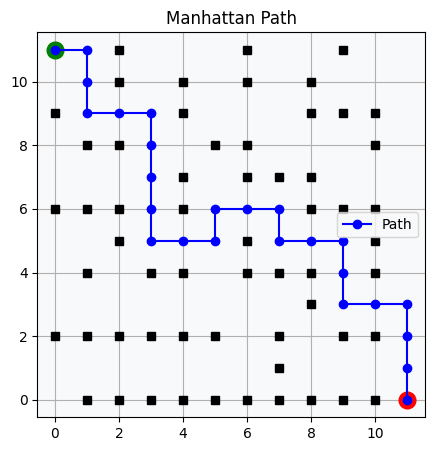

===== Scaled Manhattan (×1.5) =====
Heuristic: Scaled Manhattan (×1.5)
Admissible? False
Consistent? False
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]
Path cost: 24
True shortest cost: 24
Is optimal? True



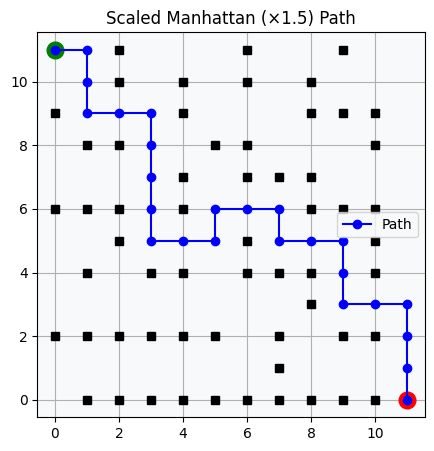

===== Inconsistent =====
Heuristic: Inconsistent
Admissible? False
Consistent? False
Path found: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]
Path cost: 24
True shortest cost: 24
Is optimal? True



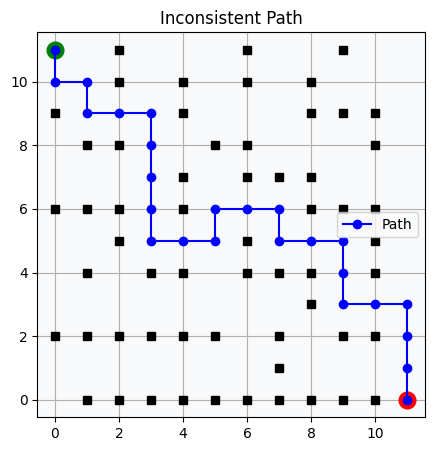

In [31]:
maze_grid = [
    ['A', 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'B'],
]

maze = Maze(maze_grid)

# Run experiments
run_experiment("Manhattan", maze, Heuristics.manhattan)
run_experiment("Scaled Manhattan (×1.5)", maze, Heuristics.scaled_manhattan)
run_experiment("Inconsistent", maze, Heuristics.inconsistent)
